### Regresi Linear: Studi Kasus Prediksi Penggunaan Bahan Bakar Mobil

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#### I. Data Preprocessing (Persiapan Data)

In [ ]:
# Baca Dataset
df = pd.read_csv('auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Menghilangkan semua MISSING VALUE dan Karakter "?"
df = df.dropna()
df = df[df['horsepower'] != '?']

# Memperbaiki tipe data "Horsepower"
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


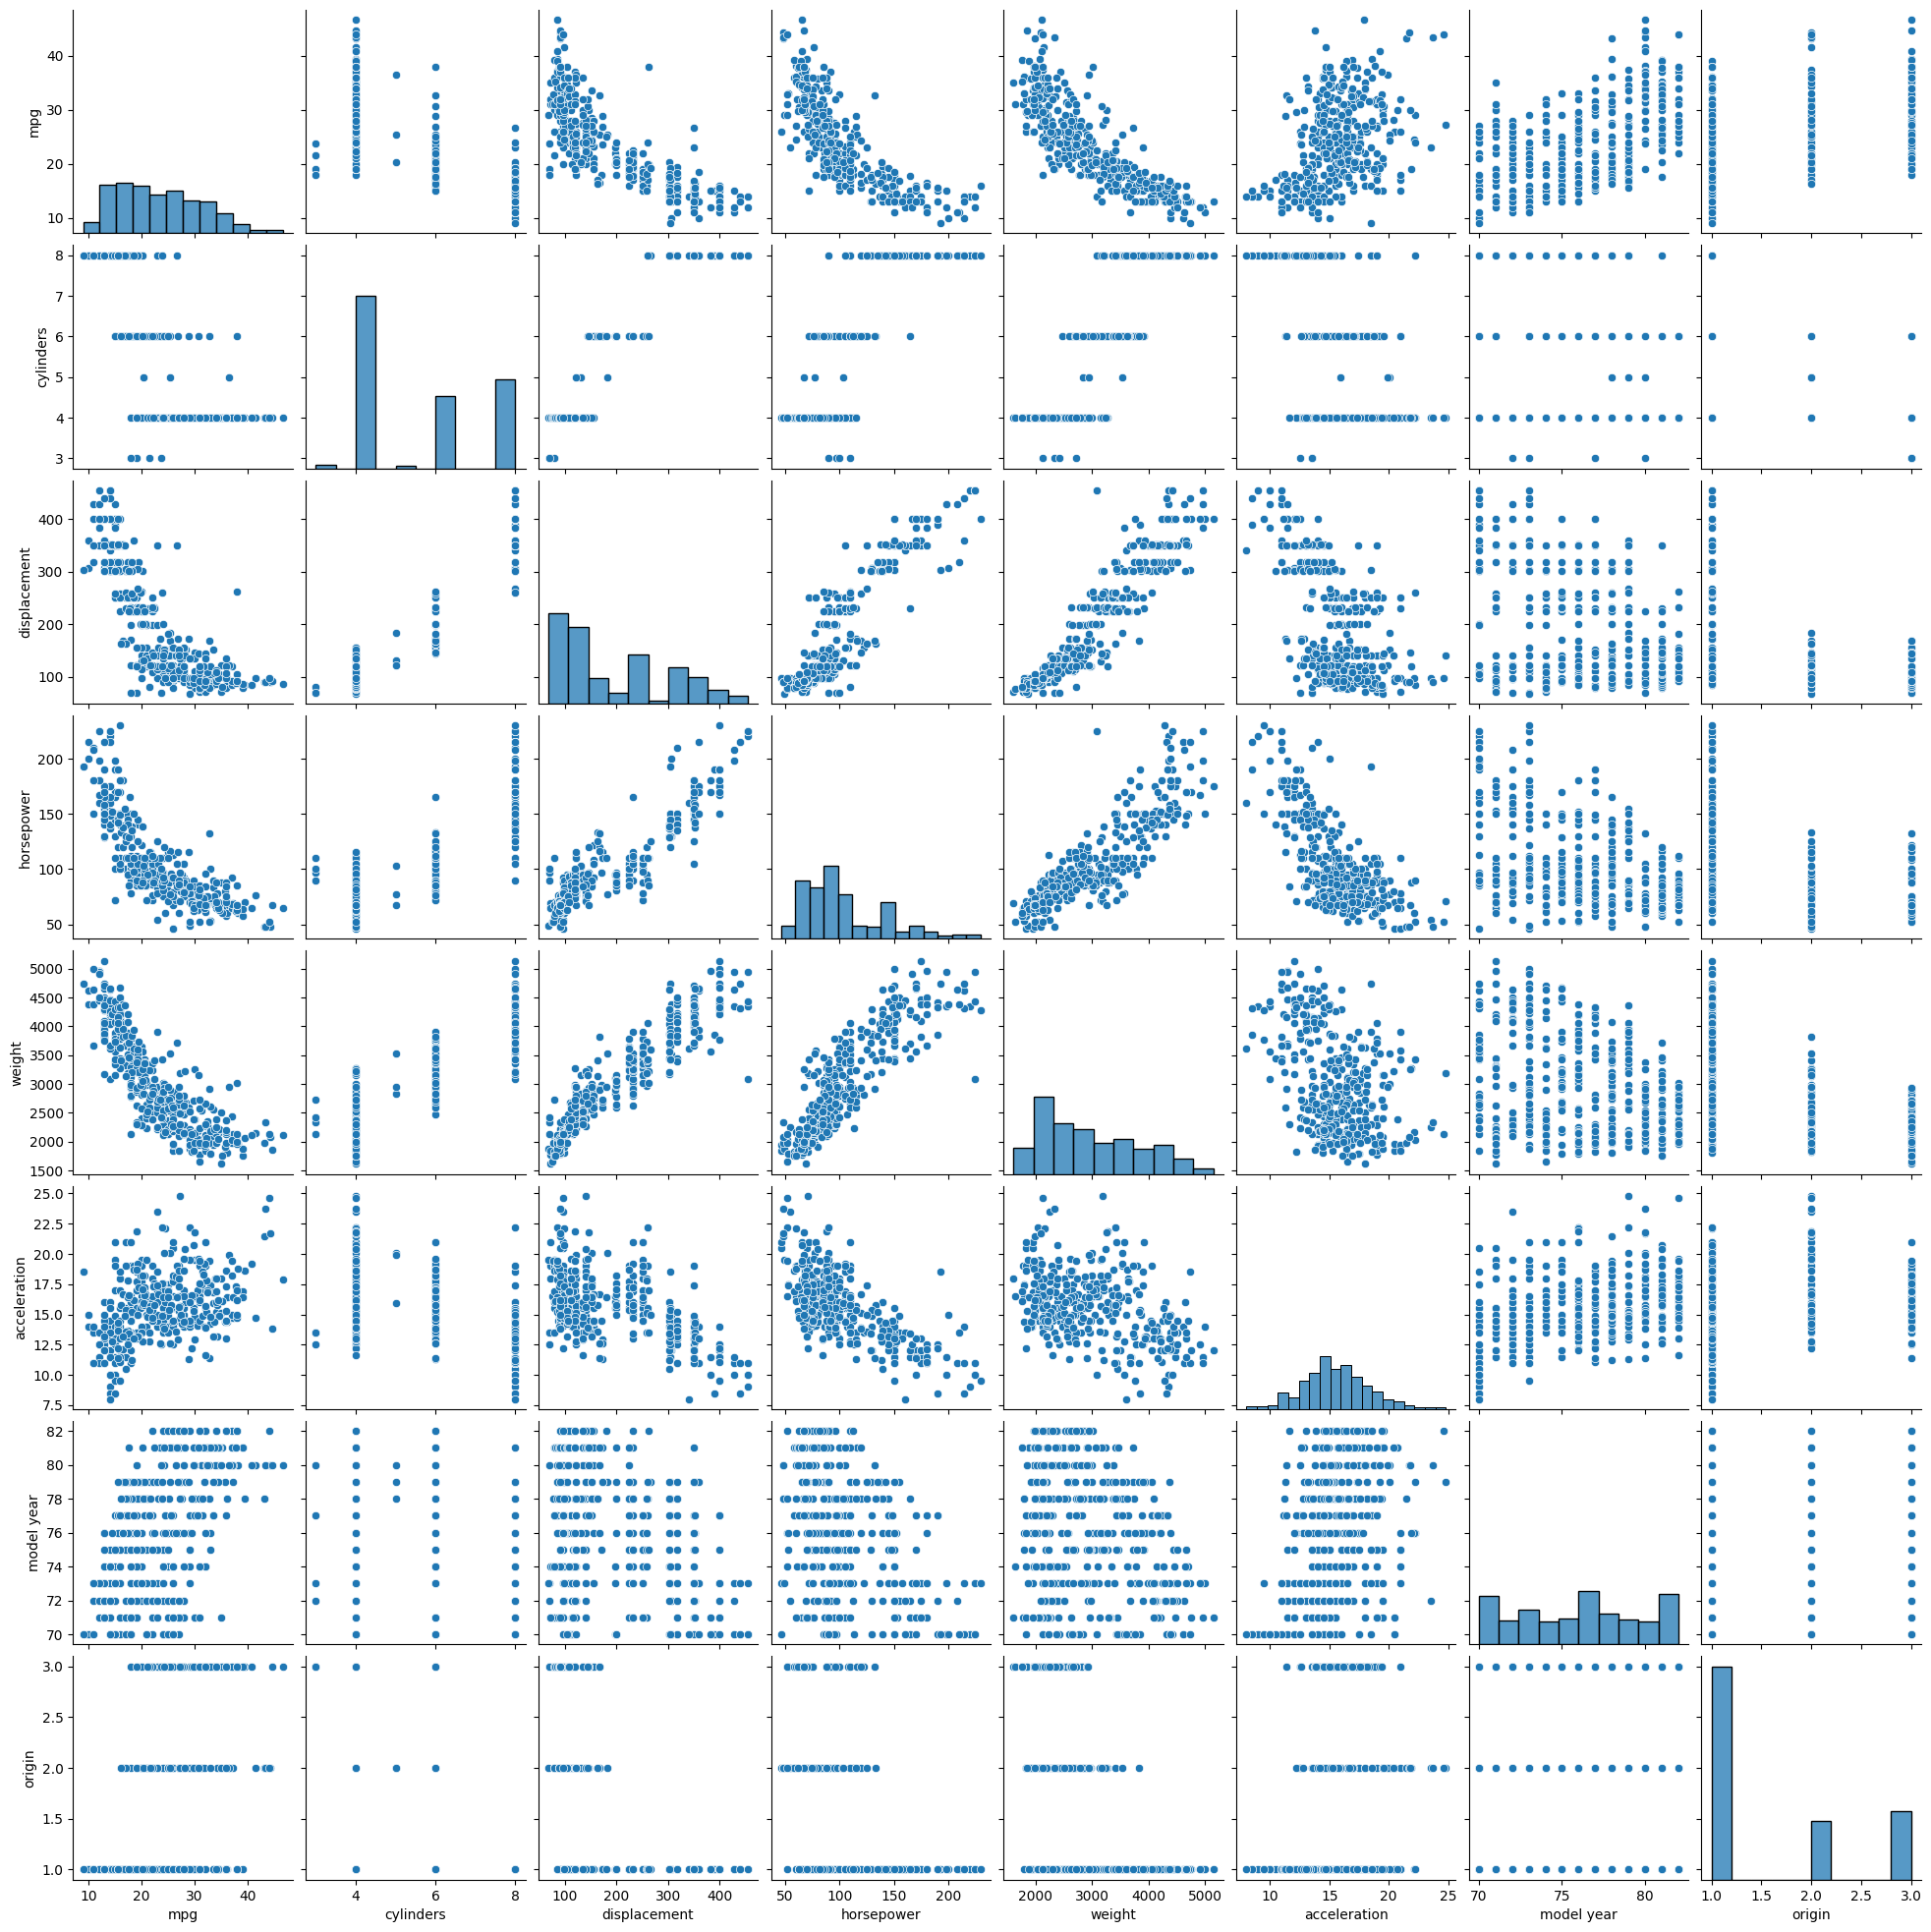

In [ ]:
sns.pairplot(df)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


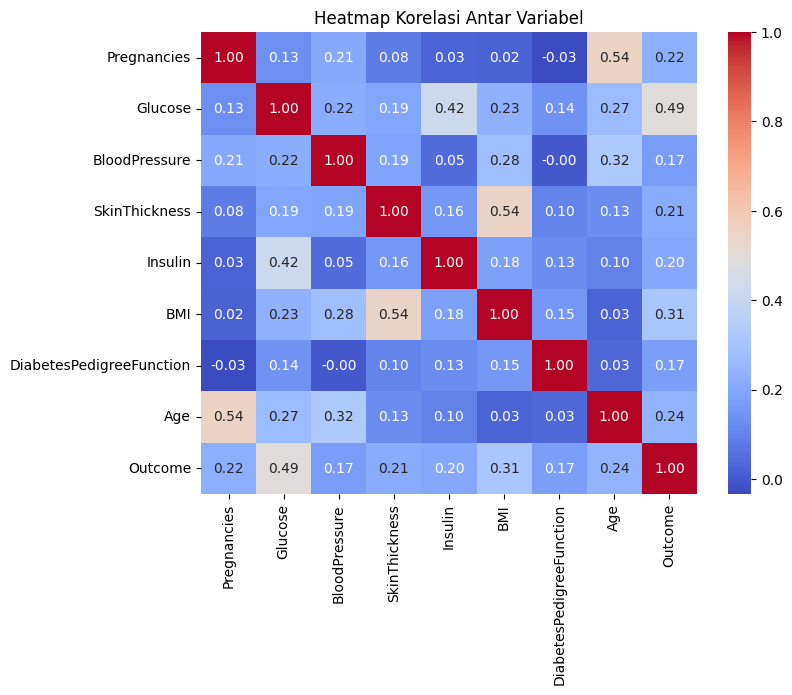

In [ ]:
# Hapus Kolom non-numerik
df = df.select_dtypes(include=['number'])
df.info()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [ ]:
# Pemilihan fitur "cylinders", "displacement", "horsepower", "weight"
df_features = df[['cylinders', 'displacement', 'horsepower', 'weight']]
df_features = df_features.apply(pd.to_numeric)

df_labels = df['mpg']

In [ ]:
# Transformasi data
# Di indonesia kita mau pakai KG
df_features['weight'] = df_features['weight'] * 0.4535923

# Transformasi M/G (Miles per Galon) menjadi KM/L
df_labels = df_labels * 0.4251437

In [ ]:
# Normalize features
df_features = (df_features - df_features.mean()) / df_features.std()
df_features.head()

,cylinders,displacement,horsepower,weight
0,1.482053,1.075915,0.663285,0.619748
1,1.482053,1.486832,1.572585,0.842258
2,1.482053,1.181033,1.182885,0.539692
3,1.482053,1.047246,1.182885,0.536160
4,1.482053,1.028134,0.923085,0.554997


In [ ]:
from sklearn.model_selection import train_test_split

# Melatih model dengan melakukan random data
X_train, X_test, y_train, y_test = train_test_split(
    df_features,
    df_labels.values,
    test_size=0.2)

# Melatih model tanpa melakukan random data
# X_train, X_test, y_train, y_test = train_test_split(
#     df_features,
#     df_labels.values,
#     test_size=0.2,
#     random_state=42)

#### II. Pelatihan Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### III. Evaluasi Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predicted = model.predict(X_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_predicted))
print("R2: %.2f" % r2_score(y_test, y_predicted))

Mean Squared Error: 3.56
R2: 0.70


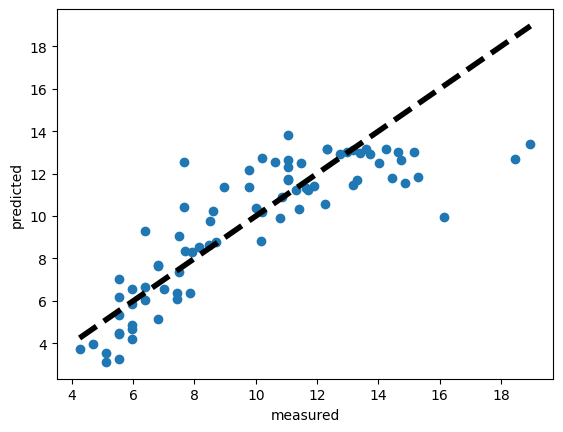

In [ ]:
# Plot perbandingan prediksi dan nilai asli
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

### Regresi Logistik: Studi Kasus Pendeteksian Penyakit Diabetes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### I. Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
df['Glucose'] = df ['Glucose'].fillna (df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna (df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df ['BMI'].median())

<Axes: >

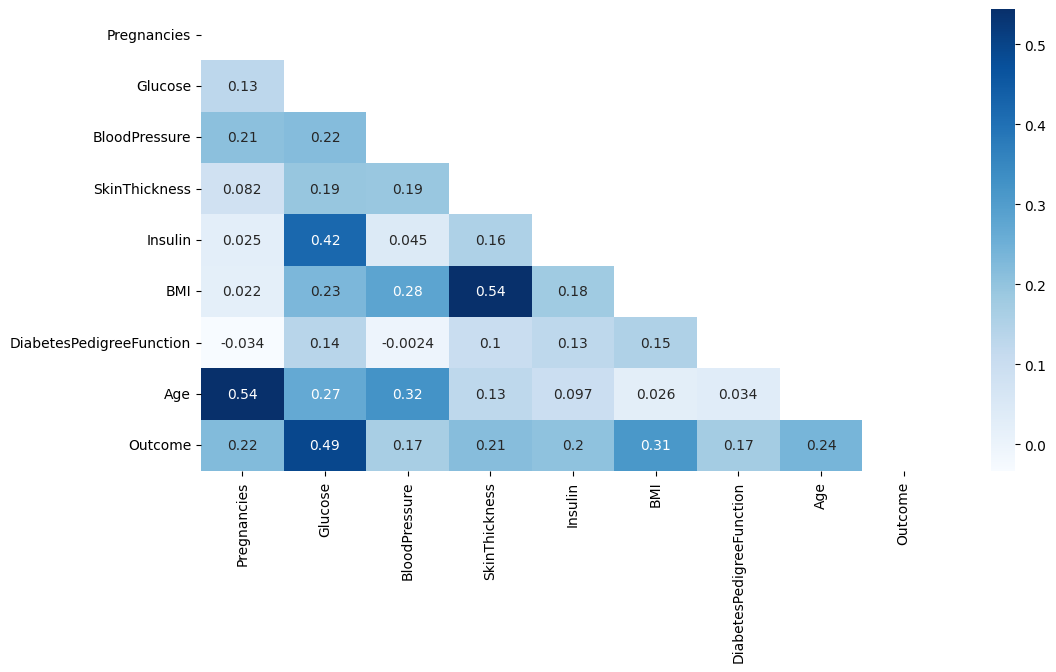

In [ ]:
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

Jumlah diabetic:  268
Jumlah healthy:  500


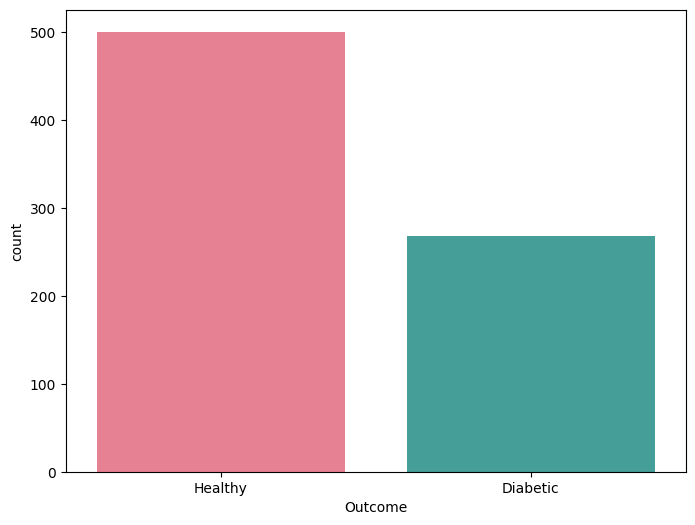

In [ ]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df, palette="husl")
ax.set_xticklabels (["Healthy", "Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Jumlah diabetic: ", diabetics)
print("Jumlah healthy: ", healthy)

#### II. Hasil Pelatihan dan Pengujian

In [ ]:
# Pecah data menjadi train dan test
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Menggunakan '=' dan axis=1 (bukan axis-1)
y = df['Outcome']  # Memastikan nama kolom ditulis dengan benar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Menggunakan '=' dan tanda koma yang benar

In [ ]:
# Normalisasi fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Gunakan '=' untuk inisialisasi scaler
X_train = sc.fit_transform(X_train)  # Gunakan '=' untuk menyimpan hasil transformasi
X_test = sc.transform(X_test)  # Gunakan '=' untuk menyimpan hasil transformasi

In [ ]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Inisialisasi model Logistic Regression dengan jumlah iterasi maksimal 200
logmodel = LogisticRegression(max_iter=200)

# Melatih model dengan data training
logmodel.fit(X_train, y_train)

# Melakukan prediksi pada data uji
prediction1 = logmodel.predict(X_test)

In [ ]:
# Menampilkan hasil evaluasi model
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\nClassification Report:\n', classification_report(y_test, prediction1))
print('\nAccuracy Score:', accuracy_score(y_test, prediction1))

Confusion Matrix:
 [[124  27]
 [ 33  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


Accuracy Score: 0.7402597402597403


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
# Akurasi
x = (124 + 47) / (124 + 27 + 33 + 47)
print(x)

0.7402597402597403


In [ ]:
# Presisi[0]
x = 124 / (124 + 33)
print(x)

0.7898089171974523


In [ ]:
# Presisi[1]
x = 47 / (47 + 27)
print(x)

0.6351351351351351


In [ ]:
# Rec[0]
x = 124 / (124 + 27)
print(x)

0.8211920529801324
